In [1]:
import numpy as np
import sys
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import pandas as pd
import GPy
import math
import matplotlib as mpl
import mpl_toolkits
import matplotlib.pyplot as plt
import scipy
import netCDF4 as nc
import glob
import scipy.io
from cycler import cycler
from scipy.interpolate import interp1d

In [15]:
tmp = pd.read_csv('./Created_Data/DeConto_2500_RCP26_quantiles.csv', header = None)
years = tmp.iloc[:,0:1]
DeConto_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/DeConto_2500_RCP45_quantiles.csv', header = None)
DeConto_45 = tmp.iloc[:,1:]

tmp = pd.read_csv('./Created_Data/Bulthuis_2500_RCP26_quantiles.csv', header = None)
Bulthuis_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/Bulthuis_2500_RCP45_quantiles.csv', header = None)
Bulthuis_45 = tmp.iloc[:,1:]

tmp = pd.read_csv('./Created_Data/Lowry_2500_RCP26_quantiles.csv', header = None)
Lowry_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/Lowry_2500_RCP45_quantiles.csv', header = None)
Lowry_45 = tmp.iloc[:,1:]

tmp = pd.read_csv('./Created_Data/LARMIP_2500_SSP126_quantiles.csv', header = None)
LARMIP_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/LARMIP_2500_SSP245_quantiles.csv', header = None)
LARMIP_45 = tmp.iloc[:,1:]

tmp = pd.read_csv('./Created_Data/Aschwanden_2500_RCP26_quantiles.csv', header = None)
Aschwanden_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/Aschwanden_2500_RCP45_quantiles.csv', header = None)
Aschwanden_45 = tmp.iloc[:,1:]

tmp = pd.read_csv('./Created_Data/GrIS_AR6_2500_SSP126_quantiles.csv', header = None)
GrIS_AR6_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/GrIS_AR6_2500_SSP245_quantiles.csv', header = None)
GrIS_AR6_45 = tmp.iloc[:,1:]

quants = pd.read_csv('./Created_Data/quantiles.csv', header = None)

In [132]:
AIS_26_pbox = np.zeros((DeConto_26.shape[0], DeConto_26.shape[1]))

for i in np.arange(53):
    tmp = pd.concat((DeConto_26.iloc[:,i],Bulthuis_26.iloc[:,i],Lowry_26.iloc[:,i],LARMIP_26.iloc[:,i]),axis=1)
    AIS_26_pbox[:,i] = np.min(tmp,axis=1)

AIS_26_pbox[:,53] = np.mean((DeConto_26.iloc[:,53],Bulthuis_26.iloc[:,53],Lowry_26.iloc[:,53],LARMIP_26.iloc[:,53]),axis=0)

for i in np.arange(54,107):
    tmp = pd.concat((DeConto_26.iloc[:,i],Bulthuis_26.iloc[:,i],Lowry_26.iloc[:,i],LARMIP_26.iloc[:,i]),axis=1)
    AIS_26_pbox[:,i] = np.max(tmp,axis=1)
    
AIS_45_pbox = np.zeros((DeConto_45.shape[0], DeConto_45.shape[1]))

for i in np.arange(53):
    tmp = pd.concat((DeConto_45.iloc[:,i],Bulthuis_45.iloc[:,i],Lowry_45.iloc[:,i],LARMIP_45.iloc[:,i]),axis=1)
    AIS_45_pbox[:,i] = np.min(tmp,axis=1)

AIS_45_pbox[:,53] = np.mean((DeConto_45.iloc[:,53],Bulthuis_45.iloc[:,53],Lowry_45.iloc[:,53],LARMIP_45.iloc[:,53]),axis=0)

for i in np.arange(54,107):
    tmp = pd.concat((DeConto_45.iloc[:,i],Bulthuis_45.iloc[:,i],Lowry_45.iloc[:,i],LARMIP_45.iloc[:,i]),axis=1)
    AIS_45_pbox[:,i] = np.max(tmp,axis=1)
    
GrIS_26_pbox = np.zeros((Aschwanden_26.shape[0], Aschwanden_26.shape[1]))

for i in np.arange(53):
    tmp = pd.concat((Aschwanden_26.iloc[:,i],GrIS_AR6_26.iloc[:,i]),axis=1)
    GrIS_26_pbox[:,i] = np.min(tmp,axis=1)

GrIS_26_pbox[:,53] = np.mean((Aschwanden_26.iloc[:,53],GrIS_AR6_26.iloc[:,53]),axis=0)

for i in np.arange(54,107):
    tmp = pd.concat((Aschwanden_26.iloc[:,i],GrIS_AR6_26.iloc[:,i]),axis=1)
    GrIS_26_pbox[:,i] = np.max(tmp,axis=1)
    
GrIS_45_pbox = np.zeros((Aschwanden_45.shape[0], Aschwanden_45.shape[1]))

for i in np.arange(53):
    tmp = pd.concat((Aschwanden_45.iloc[:,i],GrIS_AR6_45.iloc[:,i]),axis=1)
    GrIS_45_pbox[:,i] = np.min(tmp,axis=1)

GrIS_45_pbox[:,53] = np.mean((Aschwanden_45.iloc[:,53],GrIS_AR6_45.iloc[:,53]),axis=0)

for i in np.arange(54,107):
    tmp = pd.concat((Aschwanden_45.iloc[:,i],GrIS_AR6_45.iloc[:,i]),axis=1)
    GrIS_45_pbox[:,i] = np.max(tmp,axis=1)

In [133]:
tmp = pd.read_csv('./Created_Data/Glaciers_2500_SSP126_quantiles.csv', header = None)
glac_126 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/Glaciers_2500_SSP245_quantiles.csv', header = None)
glac_245 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/THE_2500_RCP26_quantiles.csv', header = None)
the_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/THE_2500_RCP45_quantiles.csv', header = None)
the_45 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/LWS_2500_RCP26_quantiles.csv', header = None)
lws_26 = tmp.iloc[:,1:]
tmp = pd.read_csv('./Created_Data/LWS_2500_RCP45_quantiles.csv', header = None)
lws_45 = tmp.iloc[:,1:]

np.savetxt('./Created_Data/GrIS_2500_SSP126_quantiles_pbox.csv', np.concatenate((years, GrIS_26_pbox),axis=1), delimiter=',')
np.savetxt('./Created_Data/GrIS_2500_SSP245_quantiles_pbox.csv', np.concatenate((years, GrIS_45_pbox),axis=1), delimiter=',')

np.savetxt('./Created_Data/AIS_2500_RCP26_quantiles_pbox.csv', np.concatenate((years, AIS_26_pbox),axis=1), delimiter=',')
np.savetxt('./Created_Data/AIS_2500_RCP45_quantiles_pbox.csv', np.concatenate((years, AIS_45_pbox),axis=1), delimiter=',')

GMSL_26_quant = AIS_26_pbox + GrIS_26_pbox + glac_126 + the_26 + lws_26
GMSL_45_quant = AIS_45_pbox + GrIS_45_pbox + glac_245 + the_45 + lws_45

np.savetxt('./Created_Data/GMSL_2500_RCP26_quantiles_new.csv', np.concatenate((years, GMSL_26_quant),axis=1), delimiter=',')
np.savetxt('./Created_Data/GMSL_2500_RCP45_quantiles_new.csv', np.concatenate((years, GMSL_45_quant),axis=1), delimiter=',')


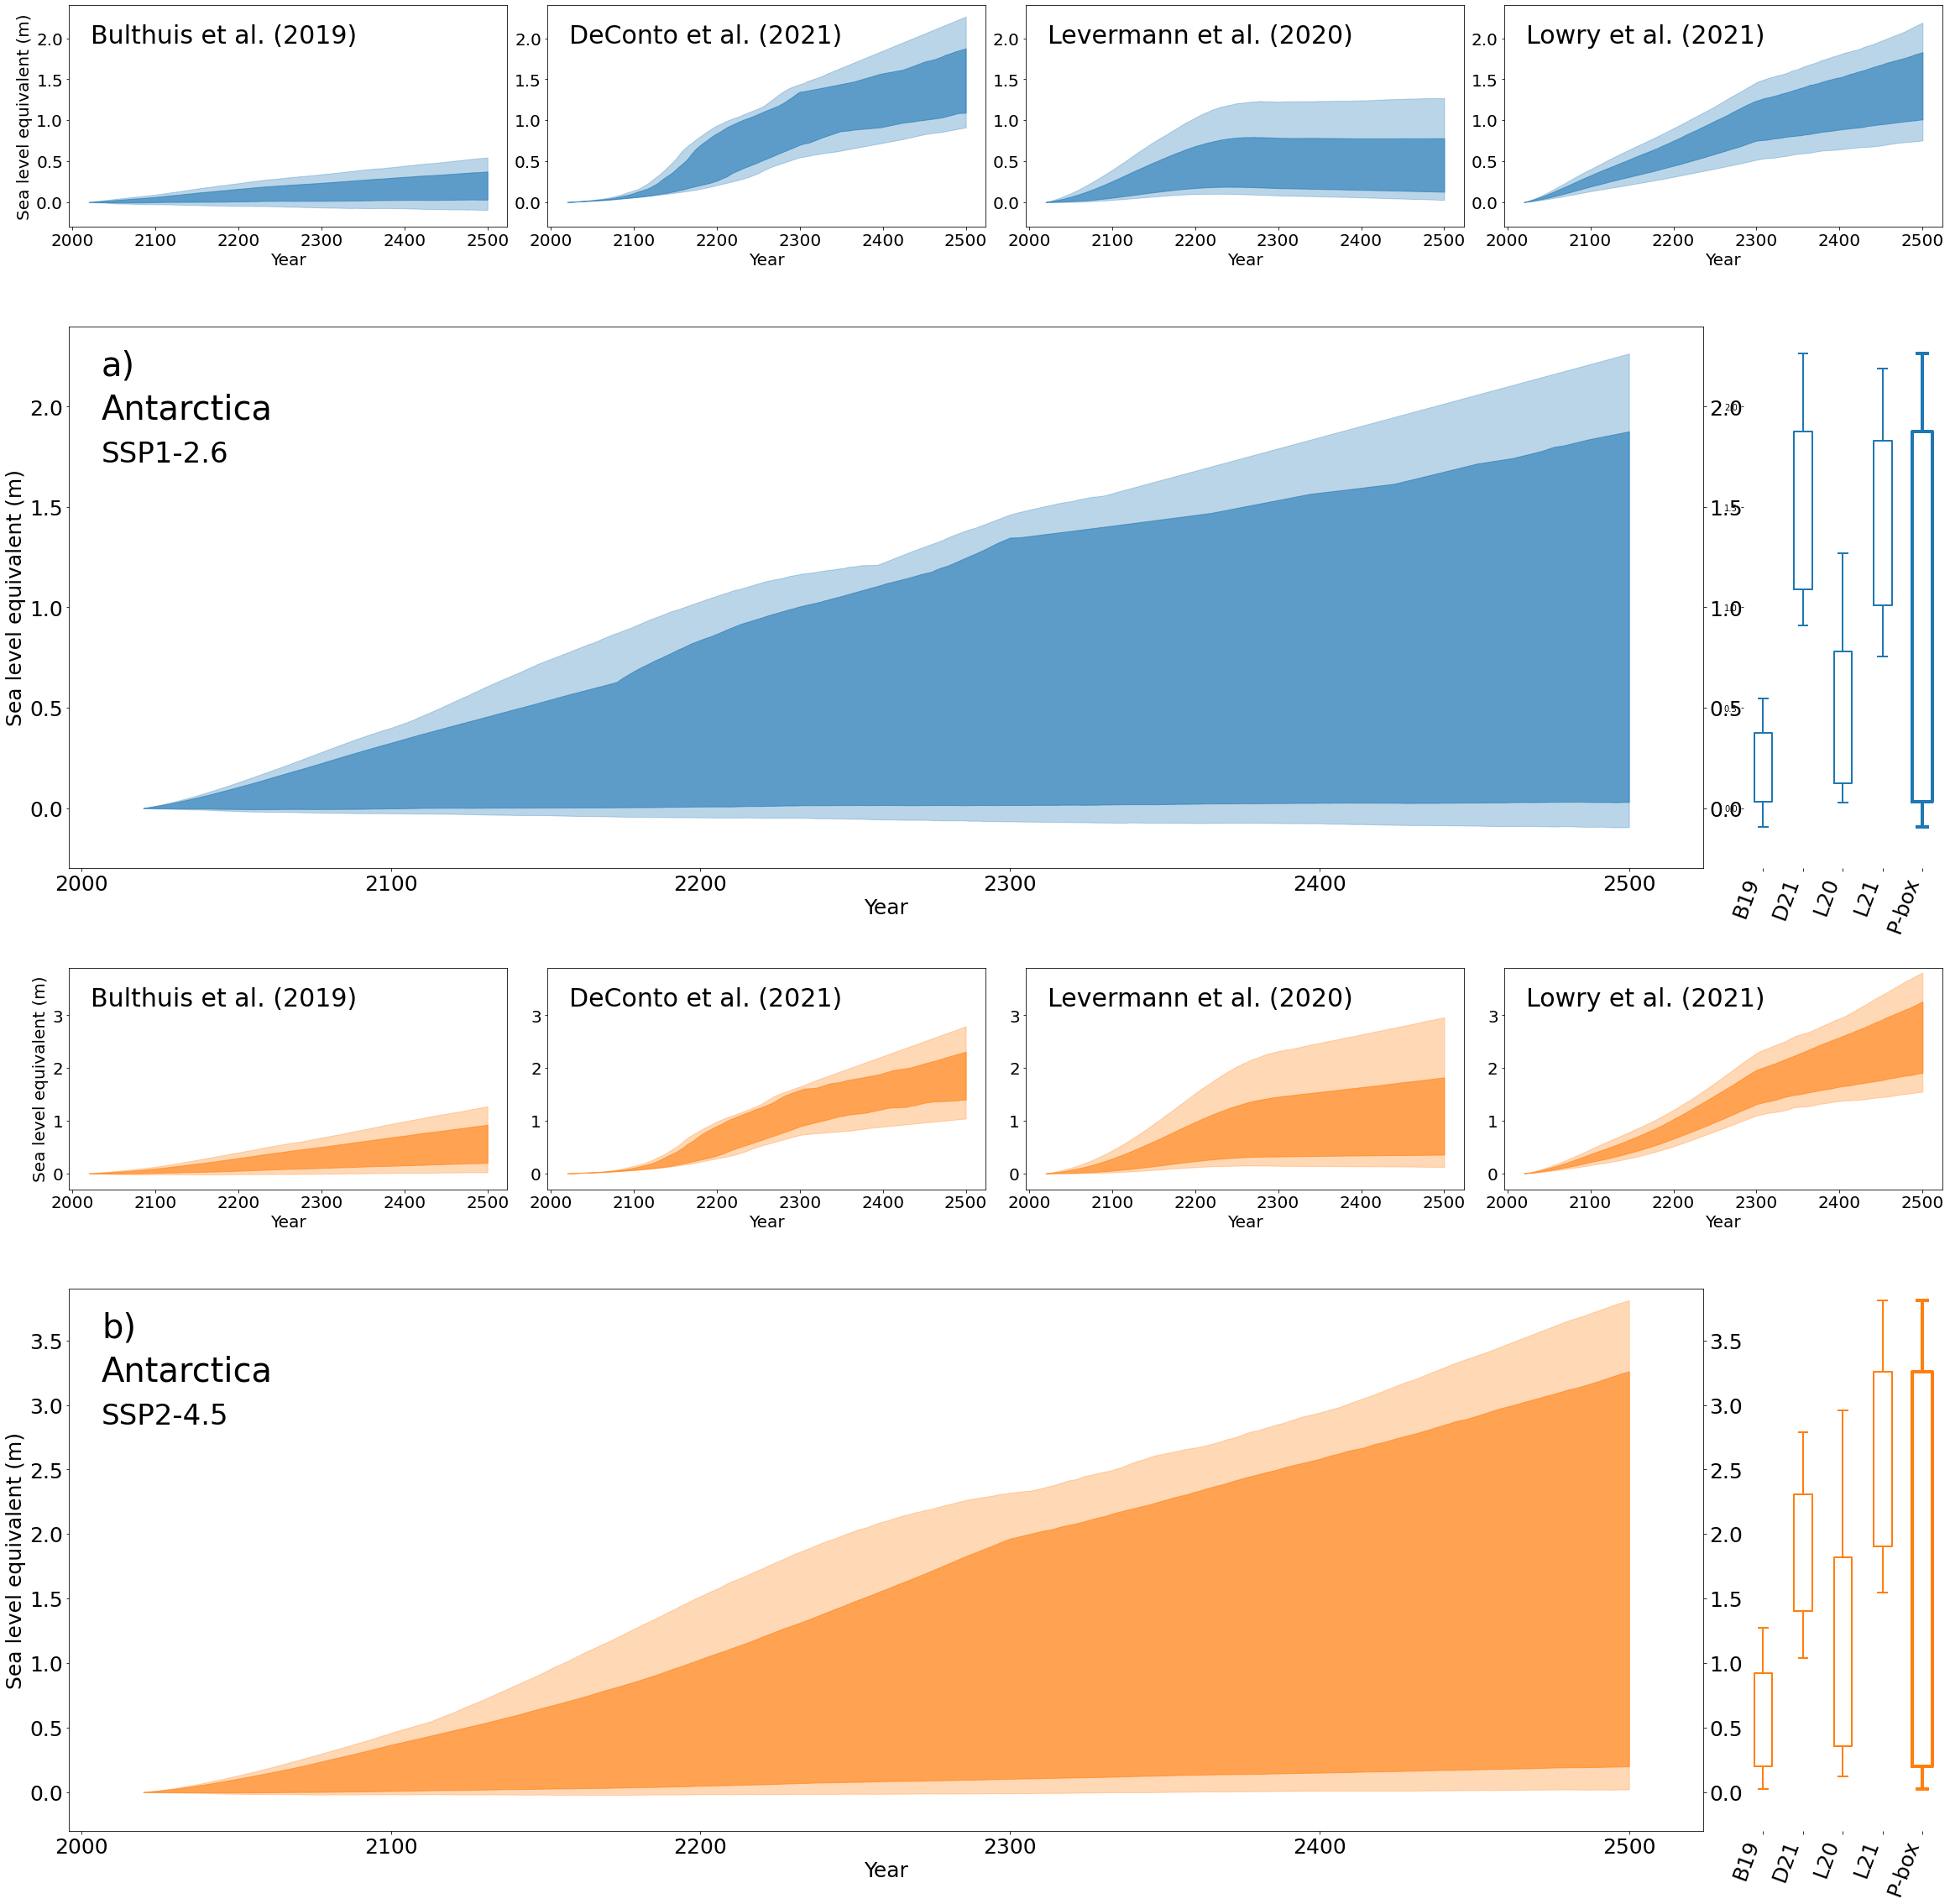

In [324]:
q = [7, 19, 53, 87, 99]
q2 = [7, 19, 87, 99]

fig, axes = plt.subplot_mosaic("AABBCCDD;EEEEEEEF;EEEEEEEF;GGHHIIJJ;KKKKKKKL;KKKKKKKL", figsize=(40,40))


axes["A"].set_ylim(bottom = -0.3, top=2.4)
#axes["A"].plot(years.iloc[:,0], Bulthuis_26.iloc[:,q[2]], '-', c='C0', linewidth=2.5, label = 'Bulthuis et al. (2019)')
#axes["A"].plot(years.iloc[:,0], Bulthuis_26.iloc[:,q[0]], '--', c='C0', linewidth=1.5)
#axes["A"].plot(years.iloc[:,0], Bulthuis_26.iloc[:,q[4]], '--', c='C0', linewidth=1.5)
axes["A"].fill_between(years.iloc[:,0], Bulthuis_26.iloc[:,q[0]], Bulthuis_26.iloc[:,q[4]], color='C0', alpha=0.3)
axes["A"].fill_between(years.iloc[:,0], Bulthuis_26.iloc[:,q[1]], Bulthuis_26.iloc[:,q[3]], color='C0', alpha=0.6)
axes["A"].annotate('Bulthuis et al. (2019)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["A"].set_xlabel('Year', size = 20)
axes["A"].set_ylabel('Sea level equivalent (m)', size = 20)
axes["A"].tick_params(axis="both",labelsize = 20)


axes["B"].set_ylim(bottom = -0.3, top=2.4)
#axes["B"].plot(years.iloc[:,0], DeConto_26.iloc[:,q[2]], '-', c='C0', linewidth=2.5, label = 'DeConto et al. (2021)')
#axes["B"].plot(years.iloc[:,0], DeConto_26.iloc[:,q[0]], '--', c='C0', linewidth=1.5)
#axes["B"].plot(years.iloc[:,0], DeConto_26.iloc[:,q[4]], '--', c='C0', linewidth=1.5)
axes["B"].fill_between(years.iloc[:,0], DeConto_26.iloc[:,q[0]],DeConto_26.iloc[:,q[4]], color='C0', alpha=0.3)
axes["B"].fill_between(years.iloc[:,0], DeConto_26.iloc[:,q[1]],DeConto_26.iloc[:,q[3]], color='C0', alpha=0.6)
axes["B"].annotate('DeConto et al. (2021)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["B"].set_xlabel('Year', size = 20)
#axes["B"].set_ylabel('Sea level equivalent (m)', size = 20)
axes["B"].tick_params(axis="both",labelsize = 20)

axes["C"].set_ylim(bottom = -0.3, top=2.4)
#axes["C"].plot(years.iloc[:,0], LARMIP_26.iloc[:,q[2]], '-', c='C0', linewidth=2.5, label = 'Levermann et al. (2020)')
#axes["C"].plot(years.iloc[:,0], LARMIP_26.iloc[:,q[0]], '--', c='C0', linewidth=1.5)
#axes["C"].plot(years.iloc[:,0], LARMIP_26.iloc[:,q[4]], '--', c='C0', linewidth=1.5)
axes["C"].fill_between(years.iloc[:,0], LARMIP_26.iloc[:,q[0]], LARMIP_26.iloc[:,q[4]], color='C0', alpha = 0.3)
axes["C"].fill_between(years.iloc[:,0], LARMIP_26.iloc[:,q[1]], LARMIP_26.iloc[:,q[3]], color='C0', alpha = 0.6)
axes["C"].annotate('Levermann et al. (2020)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["C"].set_xlabel('Year', size = 20)
#axes["C"].set_ylabel('Sea level equivalent (m)', size = 20)
axes["C"].tick_params(axis="both",labelsize = 20)

axes["D"].set_ylim(bottom = -0.3, top=2.4)
#axes["D"].plot(years.iloc[:,0], Lowry_26.iloc[:,q[2]], '-', c='C0', linewidth=2.5, label = 'Lowry et al. (2021)')
#axes["D"].plot(years.iloc[:,0], Lowry_26.iloc[:,q[0]], '--', c='C0', linewidth=1.5)
#axes["D"].plot(years.iloc[:,0], Lowry_26.iloc[:,q[4]], '--', c='C0', linewidth=1.5)
axes["D"].fill_between(years.iloc[:,0], Lowry_26.iloc[:,q[0]], Lowry_26.iloc[:,q[4]], color='C0', alpha=0.3)
axes["D"].fill_between(years.iloc[:,0], Lowry_26.iloc[:,q[1]], Lowry_26.iloc[:,q[3]], color='C0', alpha=0.6)
axes["D"].annotate('Lowry et al. (2021)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["D"].set_xlabel('Year', size = 20)
#axes["D"].set_ylabel('Sea level equivalent (m)', size = 20)
axes["D"].tick_params(axis="both",labelsize = 20)

axes["E"].set_ylim(bottom = -0.3, top=2.4)
#axes["E"].plot(years.iloc[:,0], AIS_26_pbox[:,q[2]], '-', c='C0', linewidth=4)
#axes["E"].plot(years.iloc[:,0], AIS_26_pbox[:,q[0]], '--', c='C0', linewidth=3)
#axes["E"].plot(years.iloc[:,0], AIS_26_pbox[:,q[4]], '--', c='C0', linewidth=3)
axes["E"].fill_between(years.iloc[:,0], AIS_26_pbox[:,q[0]], AIS_26_pbox[:,q[4]], color='C0', alpha=0.3)
axes["E"].fill_between(years.iloc[:,0], AIS_26_pbox[:,q[1]], AIS_26_pbox[:,q[3]], color='C0', alpha=0.6)
axes["E"].annotate('a)', xy=(0.02, 0.91), xycoords='axes fraction', size = 40)
axes["E"].annotate('Antarctica', xy=(0.02, 0.83), xycoords='axes fraction', size = 40)
axes["E"].annotate('SSP1-2.6', xy=(0.02, 0.75), xycoords='axes fraction', size = 34)
axes["E"].set_xlabel('Year', size = 25)
axes["E"].set_ylabel('Sea level equivalent (m)', size = 25)
axes["E"].tick_params(axis="y", right=True, labelsize = 25, labelright=True)
axes["E"].tick_params(axis="x",labelsize = 25)

axes["F"].set_ylim(bottom = -0.3, top=2.4)
axes["F"].boxplot((Bulthuis_26.iloc[-1,q], DeConto_26.iloc[-1,q], LARMIP_26.iloc[-1,q], Lowry_26.iloc[-1,q]), whis = (0,100), 
            medianprops={"color": "C0", "linewidth": 0}, boxprops={"color": "C0", "linewidth": 2}, 
            whiskerprops={"color": "C0", "linewidth": 2}, capprops={"color": "C0", "linewidth": 2}, 
            labels = ('B19', 'D21', 'L20', 'L21'))
axes["F"].set_ylim(bottom = -0.3, top=2.4)
axes["F"].boxplot((AIS_26_pbox[-1,q]), positions=[5], whis = (0,100), widths=0.5,
           medianprops={"color": "C0", "linewidth": 0}, boxprops={"color": "C0", "linewidth": 4}, 
            whiskerprops={"color": "C0", "linewidth": 4}, capprops={"color": "C0", "linewidth": 4}, 
            labels = ['P-box'])
plt.yticks([])
axes["F"].spines['top'].set_visible(False)
axes["F"].spines['right'].set_visible(False)
axes["F"].spines['bottom'].set_visible(False)
axes["F"].spines['left'].set_visible(False)
plt.setp(axes["F"].get_xticklabels(), fontsize=25, rotation=70, horizontalalignment='right')

plt.subplots_adjust(hspace=0.45)

axes["G"].set_ylim(bottom = -0.3, top=3.9)
#axes["G"].plot(years.iloc[:,0], Bulthuis_45.iloc[:,q[2]], '-', c='C1', linewidth=2.5, label = 'Bulthuis et al. (2019)')
#axes["G"].plot(years.iloc[:,0], Bulthuis_45.iloc[:,q[0]], '--', c='C1', linewidth=1.5)
#axes["G"].plot(years.iloc[:,0], Bulthuis_45.iloc[:,q[4]], '--', c='C1', linewidth=1.5)
axes["G"].fill_between(years.iloc[:,0], Bulthuis_45.iloc[:,q[0]], Bulthuis_45.iloc[:,q[4]], color='C1', alpha=0.3)
axes["G"].fill_between(years.iloc[:,0], Bulthuis_45.iloc[:,q[1]], Bulthuis_45.iloc[:,q[3]], color='C1', alpha=0.6)
axes["G"].annotate('Bulthuis et al. (2019)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["G"].set_xlabel('Year', size = 20)
axes["G"].set_ylabel('Sea level equivalent (m)', size = 20)
#axes["G"].tick_params(axis="y", right=True, labelsize = 25, labelright=True)
axes["G"].tick_params(axis="both",labelsize = 20)

axes["H"].set_ylim(bottom = -0.3, top=3.9)
#axes["H"].plot(years.iloc[:,0], DeConto_45.iloc[:,q[2]], '-', c='C1', linewidth=2.5, label = 'DeConto et al. (2021)')
#axes["H"].plot(years.iloc[:,0], DeConto_45.iloc[:,q[0]], '--', c='C1', linewidth=1.5)
#axes["H"].plot(years.iloc[:,0], DeConto_45.iloc[:,q[4]], '--', c='C1', linewidth=1.5)
axes["H"].fill_between(years.iloc[:,0], DeConto_45.iloc[:,q[0]],DeConto_45.iloc[:,q[4]], color='C1', alpha=0.3)
axes["H"].fill_between(years.iloc[:,0], DeConto_45.iloc[:,q[1]],DeConto_45.iloc[:,q[3]], color='C1', alpha=0.6)
axes["H"].annotate('DeConto et al. (2021)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["H"].set_xlabel('Year', size = 20)
#axes["H"].set_ylabel('Sea level equivalent (m)', size = 20)
#axes["H"].tick_params(axis="y", right=True, labelsize = 25, labelright=True)
axes["H"].tick_params(axis="both",labelsize = 20)

axes["I"].set_ylim(bottom = -0.3, top=3.9)
#axes["I"].plot(years.iloc[:,0], LARMIP_45.iloc[:,q[2]], '-', c='C1', linewidth=2.5, label = 'Levermann et al. (2020)')
#axes["I"].plot(years.iloc[:,0], LARMIP_45.iloc[:,q[0]], '--', c='C1', linewidth=1.5)
#axes["I"].plot(years.iloc[:,0], LARMIP_45.iloc[:,q[4]], '--', c='C1', linewidth=1.5)
axes["I"].fill_between(years.iloc[:,0], LARMIP_45.iloc[:,q[0]], LARMIP_45.iloc[:,q[4]], color='C1', alpha = 0.3)
axes["I"].fill_between(years.iloc[:,0], LARMIP_45.iloc[:,q[1]], LARMIP_45.iloc[:,q[3]], color='C1', alpha = 0.6)
axes["I"].annotate('Levermann et al. (2020)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["I"].set_xlabel('Year', size = 20)
#axes["I"].set_ylabel('Sea level equivalent (m)', size = 20)
#axes["I"].tick_params(axis="y", right=True, labelsize = 25, labelright=True)
axes["I"].tick_params(axis="both",labelsize = 20)

axes["J"].set_ylim(bottom = -0.3, top=3.9)
#axes["J"].plot(years.iloc[:,0], Lowry_45.iloc[:,q[2]], '-', c='C1', linewidth=2.5, label = 'Lowry et al. (2021)')
#axes["J"].plot(years.iloc[:,0], Lowry_45.iloc[:,q[0]], '--', c='C1', linewidth=1.5)
#axes["J"].plot(years.iloc[:,0], Lowry_45.iloc[:,q[4]], '--', c='C1', linewidth=1.5)
axes["J"].fill_between(years.iloc[:,0], Lowry_45.iloc[:,q[0]], Lowry_45.iloc[:,q[4]], color='C1', alpha=0.3)
axes["J"].fill_between(years.iloc[:,0], Lowry_45.iloc[:,q[1]], Lowry_45.iloc[:,q[3]], color='C1', alpha=0.6)
axes["J"].annotate('Lowry et al. (2021)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["J"].set_xlabel('Year', size = 20)
#axes["J"].set_ylabel('Sea level equivalent (m)', size = 20)
#axes["J"].tick_params(axis="y", right=True, labelsize = 25, labelright=True)
axes["J"].tick_params(axis="both",labelsize = 20)

axes["K"].set_ylim(bottom = -0.3, top=3.9)
#axes["K"].plot(years.iloc[:,0], AIS_45_pbox[:,q[2]], '-', c='C1', linewidth=4)
#axes["K"].plot(years.iloc[:,0], AIS_45_pbox[:,q[0]], '--', c='C1', linewidth=3)
#axes["K"].plot(years.iloc[:,0], AIS_45_pbox[:,q[4]], '--', c='C1', linewidth=3)
axes["K"].fill_between(years.iloc[:,0], AIS_45_pbox[:,q[0]], AIS_45_pbox[:,q[4]], color='C1', alpha=0.3)
axes["K"].fill_between(years.iloc[:,0], AIS_45_pbox[:,q[1]], AIS_45_pbox[:,q[3]], color='C1', alpha=0.6)
axes["K"].annotate('b)', xy=(0.02, 0.91), xycoords='axes fraction', size = 40)
axes["K"].annotate('Antarctica', xy=(0.02, 0.83), xycoords='axes fraction', size = 40)
axes["K"].annotate('SSP2-4.5', xy=(0.02, 0.75), xycoords='axes fraction', size = 34)
axes["K"].set_xlabel('Year', size = 25)
axes["K"].set_ylabel('Sea level equivalent (m)', size = 25)
axes["K"].tick_params(axis="y", right=True, labelsize = 25, labelright=True)
axes["K"].tick_params(axis="x",labelsize = 25)

axes["L"].set_ylim(bottom = -0.3, top=3.9)
axes["L"].boxplot((Bulthuis_45.iloc[-1,q], DeConto_45.iloc[-1,q], LARMIP_45.iloc[-1,q], Lowry_45.iloc[-1,q]), whis = (0,100), 
            medianprops={"color": "C1", "linewidth": 0}, boxprops={"color": "C1", "linewidth": 2}, 
            whiskerprops={"color": "C1", "linewidth": 2}, capprops={"color": "C1", "linewidth": 2}, 
            labels = ('B19', 'D21', 'L20', 'L21'))
axes["L"].boxplot((AIS_45_pbox[-1,q]), positions=[5], whis = (0,100), widths=0.5,
           medianprops={"color": "C1", "linewidth": 0}, boxprops={"color": "C1", "linewidth": 4}, 
            whiskerprops={"color": "C1", "linewidth": 4}, capprops={"color": "C1", "linewidth": 4}, 
            labels = ['P-box'])
plt.yticks([])
axes["L"].spines['top'].set_visible(False)
axes["L"].spines['right'].set_visible(False)
axes["L"].spines['bottom'].set_visible(False)
axes["L"].spines['left'].set_visible(False)
plt.setp(axes["L"].get_xticklabels(), fontsize=25, rotation=70, horizontalalignment='right')

f.tight_layout()
#plt.show()
plt.savefig('/Users/fionaturner/Documents/Papers/Earths-Future/AIS_fullplot_v2.pdf')

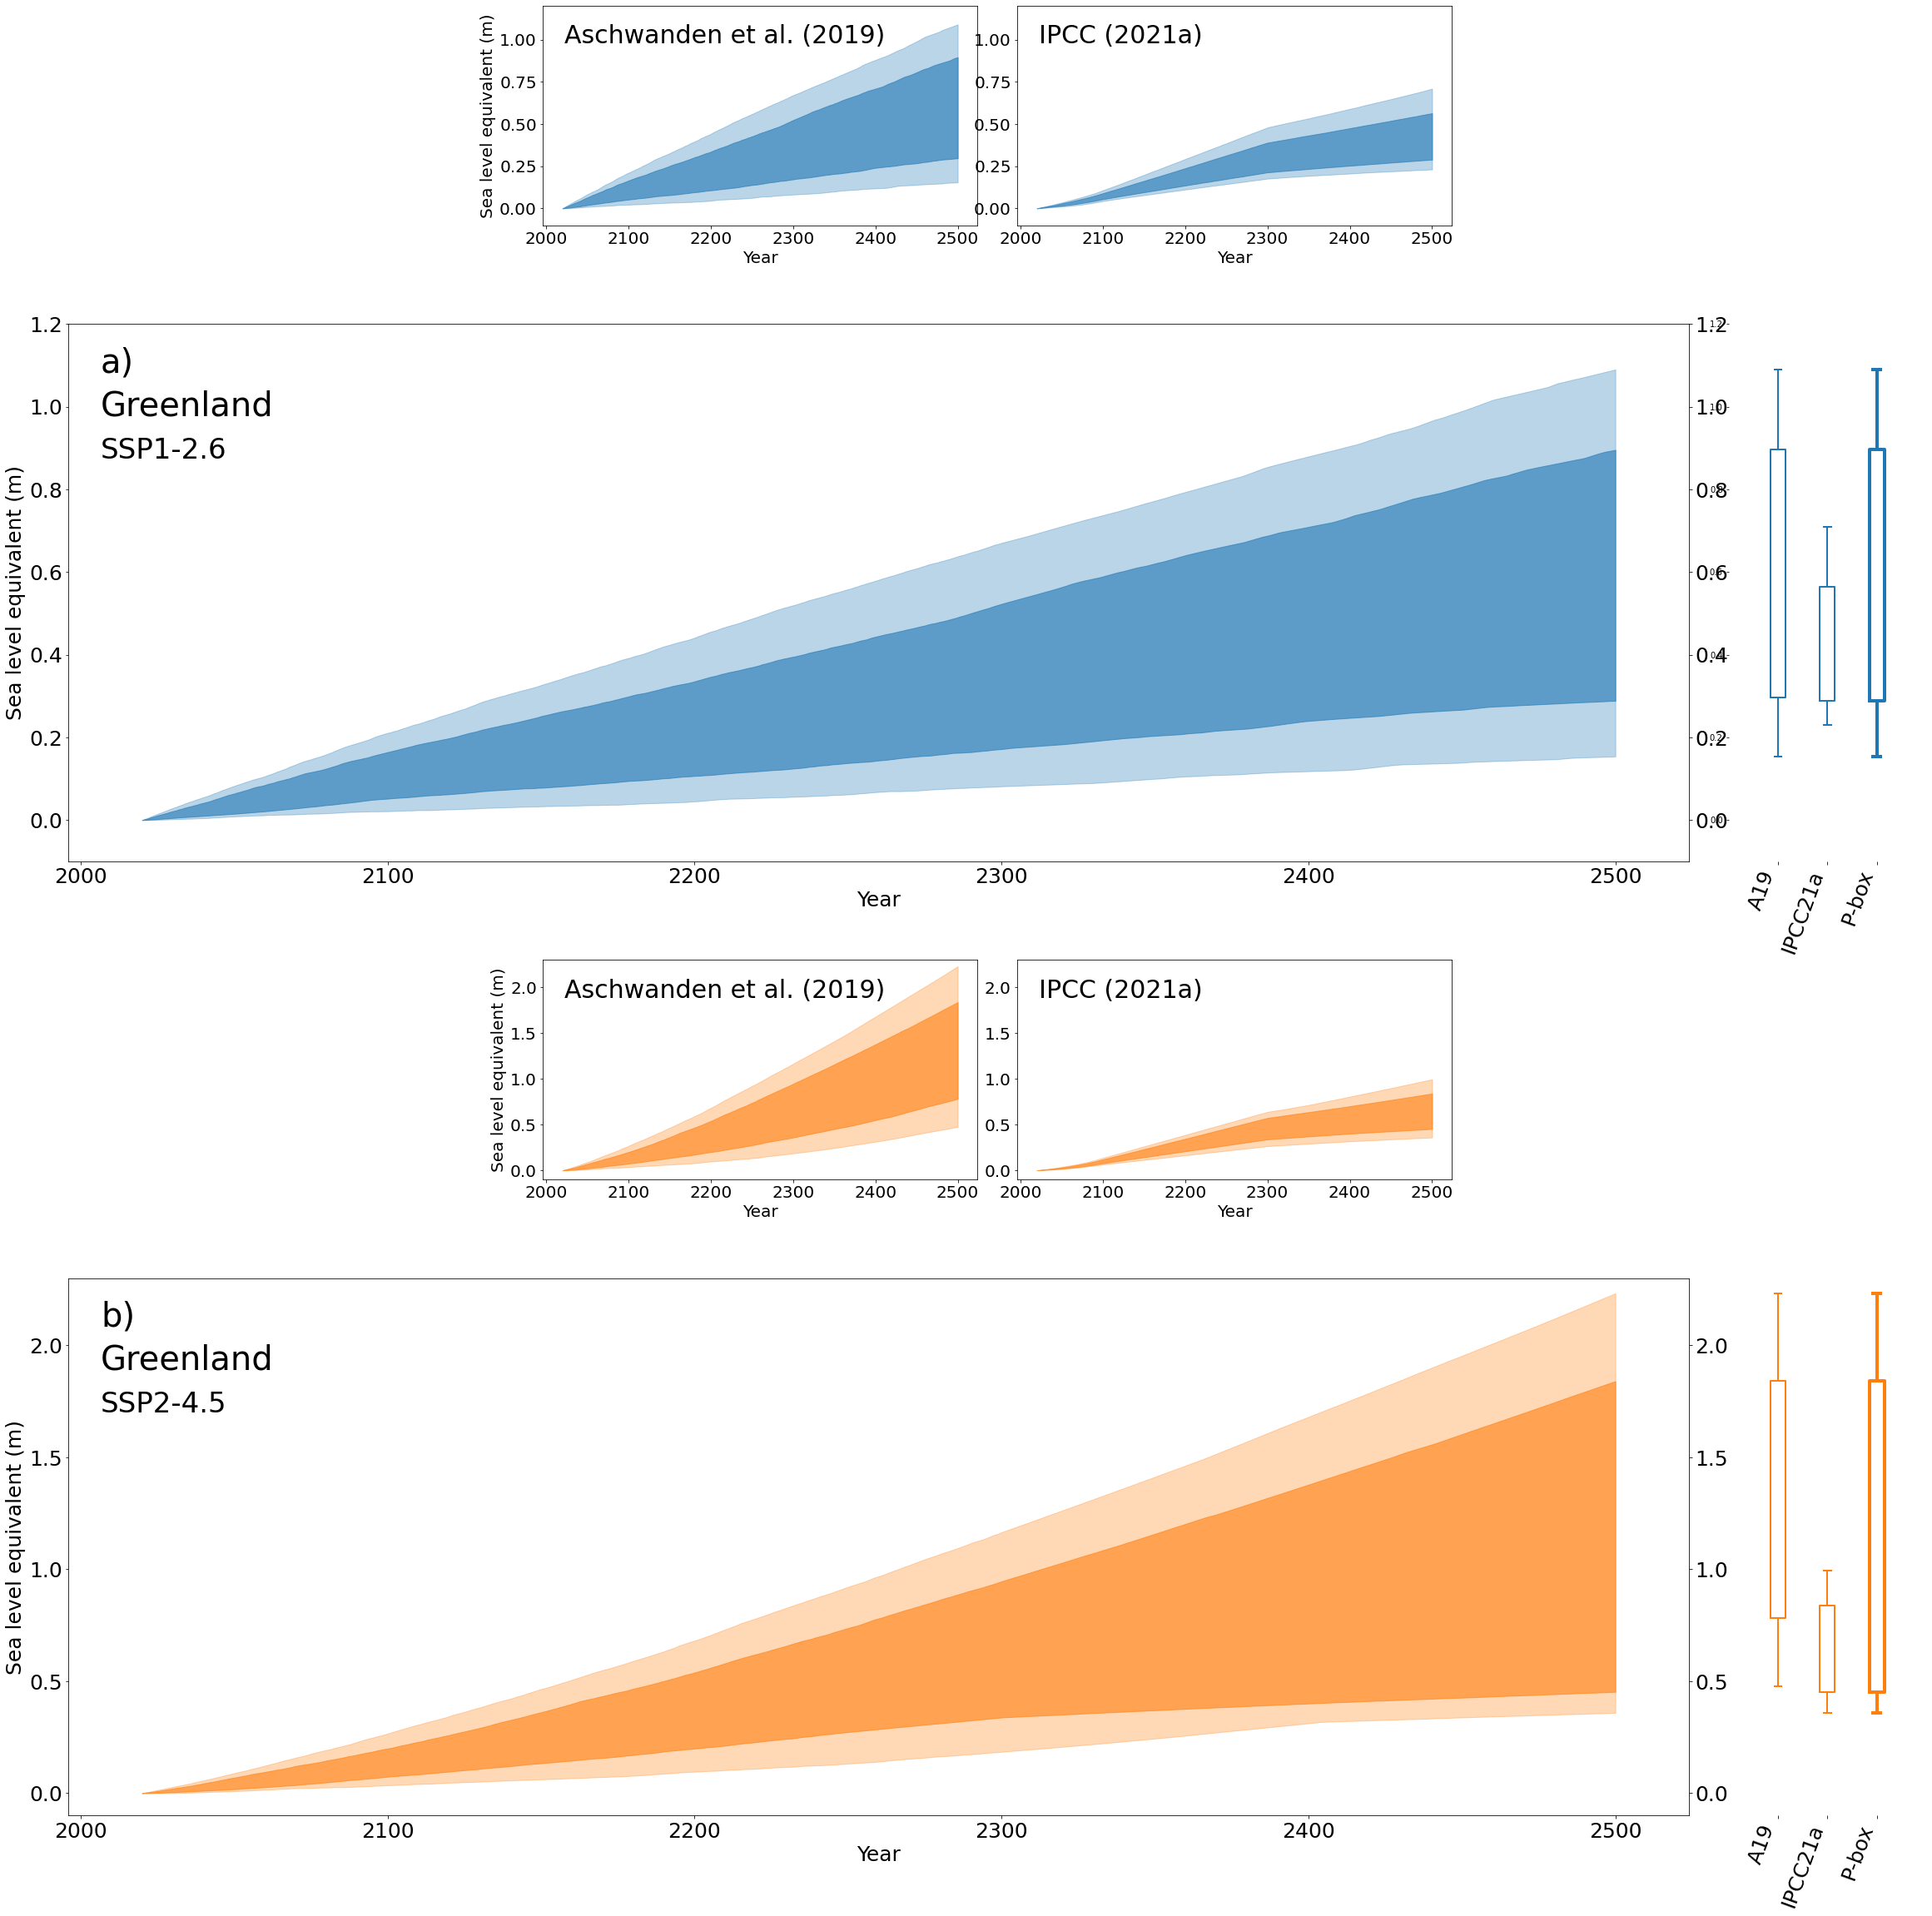

In [326]:
fig, axes = plt.subplot_mosaic("AABBCCDD;EEEEEEEF;EEEEEEEF;GGHHIIJJ;KKKKKKKL;KKKKKKKL", figsize=(40,40))

axes["A"].set_visible(False)

axes["B"].set_ylim(bottom = -0.1, top=1.2)
#axes["B"].plot(years.iloc[:,0], Aschwanden_26.iloc[:,q[2]], '-', c='C0', linewidth=2.5, label = 'Aschwanden et al. (2019)')
#axes["B"].plot(years.iloc[:,0], Aschwanden_26.iloc[:,q[0]], '--', c='C0', linewidth=1.5)
#axes["B"].plot(years.iloc[:,0], Aschwanden_26.iloc[:,q[4]], '--', c='C0', linewidth=1.5)
axes["B"].fill_between(years.iloc[:,0], Aschwanden_26.iloc[:,q[0]], Aschwanden_26.iloc[:,q[4]], color='C0', alpha=0.3)
axes["B"].fill_between(years.iloc[:,0], Aschwanden_26.iloc[:,q[1]], Aschwanden_26.iloc[:,q[3]], color='C0', alpha=0.6)
axes["B"].annotate('Aschwanden et al. (2019)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["B"].set_xlabel('Year', size = 20)
axes["B"].set_ylabel('Sea level equivalent (m)', size = 20)
axes["B"].tick_params(axis="both",labelsize = 20)


axes["C"].set_ylim(bottom = -0.1, top=1.2)
#axes["C"].plot(years.iloc[:,0], GrIS_AR6_26.iloc[:,q[2]], '-', c='C0', linewidth=2.5, label = 'IPCC (2021a)')
#axes["C"].plot(years.iloc[:,0], GrIS_AR6_26.iloc[:,q[0]], '--', c='C0', linewidth=1.5)
#axes["C"].plot(years.iloc[:,0], GrIS_AR6_26.iloc[:,q[4]], '--', c='C0', linewidth=1.5)
axes["C"].fill_between(years.iloc[:,0], GrIS_AR6_26.iloc[:,q[0]],GrIS_AR6_26.iloc[:,q[4]], color='C0', alpha=0.3)
axes["C"].fill_between(years.iloc[:,0], GrIS_AR6_26.iloc[:,q[1]],GrIS_AR6_26.iloc[:,q[3]], color='C0', alpha=0.6)
axes["C"].annotate('IPCC (2021a)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["C"].set_xlabel('Year', size = 20)
#axes["C"].set_ylabel('Sea level equivalent (m)', size = 20)
axes["C"].tick_params(axis="both",labelsize = 20)

axes["D"].set_visible(False)

axes["E"].set_ylim(bottom = -0.1, top=1.2)
#axes["E"].plot(years.iloc[:,0], GrIS_26_pbox[:,q[2]], '-', c='C0', linewidth=4)
#axes["E"].plot(years.iloc[:,0], GrIS_26_pbox[:,q[0]], '--', c='C0', linewidth=3)
#axes["E"].plot(years.iloc[:,0], GrIS_26_pbox[:,q[4]], '--', c='C0', linewidth=3)
axes["E"].fill_between(years.iloc[:,0], GrIS_26_pbox[:,q[0]], GrIS_26_pbox[:,q[4]], color='C0', alpha=0.3)
axes["E"].fill_between(years.iloc[:,0], GrIS_26_pbox[:,q[1]], GrIS_26_pbox[:,q[3]], color='C0', alpha=0.6)
axes["E"].annotate('a)', xy=(0.02, 0.91), xycoords='axes fraction', size = 40)
axes["E"].annotate('Greenland', xy=(0.02, 0.83), xycoords='axes fraction', size = 40)
axes["E"].annotate('SSP1-2.6', xy=(0.02, 0.75), xycoords='axes fraction', size = 34)
axes["E"].set_xlabel('Year', size = 25)
axes["E"].set_ylabel('Sea level equivalent (m)', size = 25)
axes["E"].tick_params(axis="y", right=True, labelsize = 25, labelright=True)
axes["E"].tick_params(axis="x",labelsize = 25)

axes["F"].set_ylim(bottom = -0.1, top=1.2)
axes["F"].boxplot((Aschwanden_26.iloc[-1,q], GrIS_AR6_26.iloc[-1,q]), positions = [1,1.5], whis = (0,100), medianprops={"color": "C0", "linewidth": 0}, 
            boxprops={"color": "C0", "linewidth": 2}, whiskerprops={"color": "C0", "linewidth": 2}, 
            capprops={"color": "C0", "linewidth": 2}, labels = ('A19', 'IPCC21a'))
axes["F"].boxplot(GrIS_26_pbox[-1,q], positions = [2], whis = (0,100), medianprops={"color": "C0", "linewidth": 0}, 
            boxprops={"color": "C0", "linewidth": 4}, whiskerprops={"color": "C0", "linewidth": 4}, 
            capprops={"color": "C0", "linewidth": 4}, labels = ['P-box'])
plt.yticks([])
axes["F"].spines['top'].set_visible(False)
axes["F"].spines['right'].set_visible(False)
axes["F"].spines['bottom'].set_visible(False)
axes["F"].spines['left'].set_visible(False)
plt.setp(axes["F"].get_xticklabels(), fontsize=25, rotation=70, horizontalalignment='right')

plt.subplots_adjust(hspace=0.45)

axes["G"].set_visible(False)

axes["H"].set_ylim(bottom = -0.1, top=2.3)
#axes["H"].plot(years.iloc[:,0], Aschwanden_45.iloc[:,q[2]], '-', c='C1', linewidth=2.5, label = 'Aschwanden et al. (2019)')
#axes["H"].plot(years.iloc[:,0], Aschwanden_45.iloc[:,q[0]], '--', c='C1', linewidth=1.5)
#axes["H"].plot(years.iloc[:,0], Aschwanden_45.iloc[:,q[4]], '--', c='C1', linewidth=1.5)
axes["H"].fill_between(years.iloc[:,0], Aschwanden_45.iloc[:,q[0]], Aschwanden_45.iloc[:,q[4]], color='C1', alpha=0.3)
axes["H"].fill_between(years.iloc[:,0], Aschwanden_45.iloc[:,q[1]], Aschwanden_45.iloc[:,q[3]], color='C1', alpha=0.6)
axes["H"].annotate('Aschwanden et al. (2019)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["H"].set_xlabel('Year', size = 20)
axes["H"].set_ylabel('Sea level equivalent (m)', size = 20)
axes["H"].tick_params(axis="both",labelsize = 20)


axes["I"].set_ylim(bottom = -0.1, top=2.3)
#axes["I"].plot(years.iloc[:,0], GrIS_AR6_45.iloc[:,q[2]], '-', c='C1', linewidth=2.5, label = 'IPCC (2021a)')
#axes["I"].plot(years.iloc[:,0], GrIS_AR6_45.iloc[:,q[0]], '--', c='C1', linewidth=1.5)
#axes["I"].plot(years.iloc[:,0], GrIS_AR6_45.iloc[:,q[4]], '--', c='C1', linewidth=1.5)
axes["I"].fill_between(years.iloc[:,0], GrIS_AR6_45.iloc[:,q[0]],GrIS_AR6_45.iloc[:,q[4]], color='C1', alpha=0.3)
axes["I"].fill_between(years.iloc[:,0], GrIS_AR6_45.iloc[:,q[1]],GrIS_AR6_45.iloc[:,q[3]], color='C1', alpha=0.6)
axes["I"].annotate('IPCC (2021a)', xy=(0.05, 0.83), xycoords='axes fraction', size = 30)
axes["I"].set_xlabel('Year', size = 20)
#axes["I"].set_ylabel('Sea level equivalent (m)', size = 20)
axes["I"].tick_params(axis="both",labelsize = 20)

axes["J"].set_visible(False)

axes["K"].set_ylim(bottom = -0.1, top=2.3)
#axes["K"].plot(years.iloc[:,0], GrIS_45_pbox[:,q[2]], '-', c='C1', linewidth=4)
#axes["K"].plot(years.iloc[:,0], GrIS_45_pbox[:,q[0]], '--', c='C1', linewidth=3)
#axes["K"].plot(years.iloc[:,0], GrIS_45_pbox[:,q[4]], '--', c='C1', linewidth=3)
axes["K"].fill_between(years.iloc[:,0], GrIS_45_pbox[:,q[0]], GrIS_45_pbox[:,q[4]], color='C1', alpha=0.3)
axes["K"].fill_between(years.iloc[:,0], GrIS_45_pbox[:,q[1]], GrIS_45_pbox[:,q[3]], color='C1', alpha=0.6)
axes["K"].annotate('b)', xy=(0.02, 0.91), xycoords='axes fraction', size = 40)
axes["K"].annotate('Greenland', xy=(0.02, 0.83), xycoords='axes fraction', size = 40)
axes["K"].annotate('SSP2-4.5', xy=(0.02, 0.75), xycoords='axes fraction', size = 34)
axes["K"].set_xlabel('Year', size = 25)
axes["K"].set_ylabel('Sea level equivalent (m)', size = 25)
axes["K"].tick_params(axis="y", right=True, labelsize = 25, labelright=True)
axes["K"].tick_params(axis="x",labelsize = 25)

axes["L"].set_ylim(bottom = -0.1, top=2.3)
axes["L"].boxplot((Aschwanden_45.iloc[-1,q], GrIS_AR6_45.iloc[-1,q]), positions = [1,1.5], whis = (0,100), medianprops={"color": "C1", "linewidth": 0}, 
            boxprops={"color": "C1", "linewidth": 2}, whiskerprops={"color": "C1", "linewidth": 2}, 
            capprops={"color": "C1", "linewidth": 2}, labels = ('A19', 'IPCC21a'))
axes["L"].boxplot(GrIS_45_pbox[-1,q], positions = [2], whis = (0,100), medianprops={"color": "C1", "linewidth": 0}, 
            boxprops={"color": "C1", "linewidth": 4}, whiskerprops={"color": "C1", "linewidth": 4}, 
            capprops={"color": "C1", "linewidth": 4}, labels = ['P-box'])
plt.yticks([])
axes["L"].spines['top'].set_visible(False)
axes["L"].spines['right'].set_visible(False)
axes["L"].spines['bottom'].set_visible(False)
axes["L"].spines['left'].set_visible(False)
plt.setp(axes["L"].get_xticklabels(), fontsize=25, rotation=70, horizontalalignment='right')


f.tight_layout()
#plt.show()
plt.savefig('/Users/fionaturner/Documents/Papers/Earths-Future/GrIS_fullplot_v2.pdf')

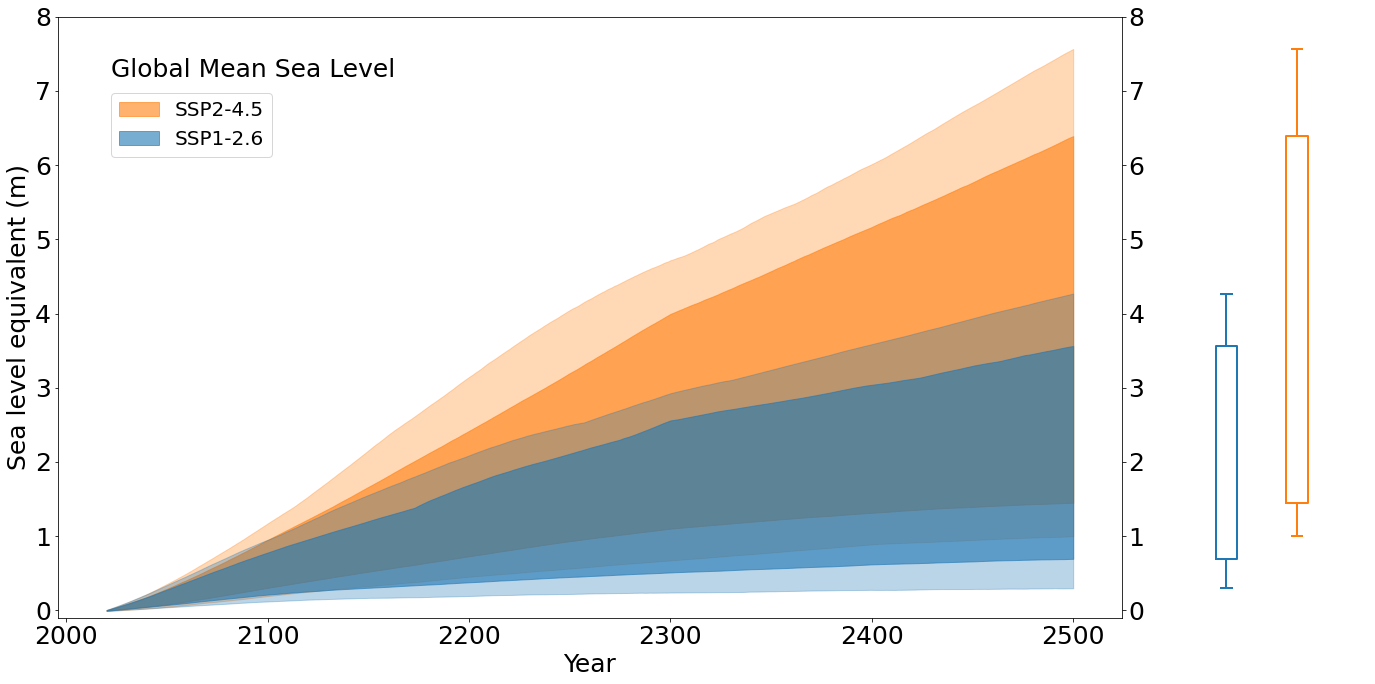

In [316]:
f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]}, figsize=(19.2,9.6))

ax1 = plt.subplot(1, 2, 1)
plt.ylim(bottom = -0.1, top=8)
#ax1.plot(years.iloc[:,0], GMSL_45_quant.iloc[:,q[2]], '-', c='C1', label = 'SSP2-4.5')
#ax1.plot(years.iloc[:,0], GMSL_26_quant.iloc[:,q[2]], '-', c='C0', label = 'SSP1-2.6')

ax1.fill_between(years.iloc[:,0], GMSL_45_quant.iloc[:,q[0]], GMSL_45_quant.iloc[:,q[4]], color='C1', alpha=0.3)
ax1.fill_between(years.iloc[:,0], GMSL_45_quant.iloc[:,q[1]], GMSL_45_quant.iloc[:,q[3]], color='C1', alpha=0.6, label = 'SSP2-4.5')

ax1.fill_between(years.iloc[:,0], GMSL_26_quant.iloc[:,q[0]], GMSL_26_quant.iloc[:,q[4]], color='C0', alpha=0.3)
ax1.fill_between(years.iloc[:,0], GMSL_26_quant.iloc[:,q[1]], GMSL_26_quant.iloc[:,q[3]], color='C0', alpha=0.6, label = 'SSP1-2.6')

ax1.legend(loc=2, bbox_to_anchor=(0.04, 0.89), fontsize = 20)
ax1.annotate('Global Mean Sea Level', xy=(0.05, 0.9), xycoords='axes fraction', size = 25)
plt.xlabel('Year', size = 25)
plt.ylabel('Sea level equivalent (m)', size = 25)
plt.setp(ax1.get_xticklabels(), fontsize=15)
plt.setp(ax1.get_yticklabels(), fontsize=15)
ax1.tick_params(right=True, labelsize = 25, labelright=True)

ax2 = plt.subplot(1, 2, 2)
plt.ylim(bottom = -0.1, top=8)
ax2.boxplot(GMSL_26_quant.iloc[-1,q], positions=[1], whis = (0,100),
            boxprops=dict(color='C0', linewidth='2'),
            capprops=dict(color='C0', linewidth='2'),
            whiskerprops=dict(color='C0', linewidth='2'),
            medianprops=dict(color='C0', linewidth='0'),
            )


box1 = plt.boxplot(GMSL_45_quant.iloc[-1,q], positions=[1.5], whis = (0,100))
plt.setp(box1['medians'], color='C1', linewidth = 0)
for item in ['boxes', 'whiskers', 'fliers', 'caps']:
        plt.setp(box1[item], color='C1', linewidth = 2)

plt.yticks([])
plt.xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.setp(ax2.get_xticklabels(),fontsize=15, rotation=30, horizontalalignment='right')


f.tight_layout()
#plt.show()
plt.savefig('/Users/fionaturner/Documents/Papers/Earths-Future/GMSL_fullplot_v2.pdf')